In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
%matplotlib inline
plt.style.use('bmh')

In [1]:
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_period_dtype
from sklearn.preprocessing import LabelEncoder, Imputer, StandardScaler
from sklearn_pandas import DataFrameMapper

# Load the dataset

In [3]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df = pd.concat([df_train.drop('Survived', axis=1), df_test])

In [4]:
print(df_train.count())
print("================")
print(df_test.count())
print("================")
print(df.count())

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64
PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64
PassengerId    1309
Pclass         1309
Name           1309
Sex            1309
Age            1046
SibSp          1309
Parch          1309
Ticket         1309
Fare           1308
Cabin           295
Embarked       1307
dtype: int64


In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [ ]:
df_train.describe().T

In [8]:
len(df_train)

891

In [19]:
def remove_missing(df, limit=0.3):
    """
    Deletes any column less than the provided limit
    """
    df = df.copy()
    matching_column = [column for column in df if df[column].count() / len(df) <= limit]
    df.drop(matching_column, axis = 1, inplace=True)
    return df

In [20]:
test = remove_missing(df_train)

### Checking the distribution of data

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


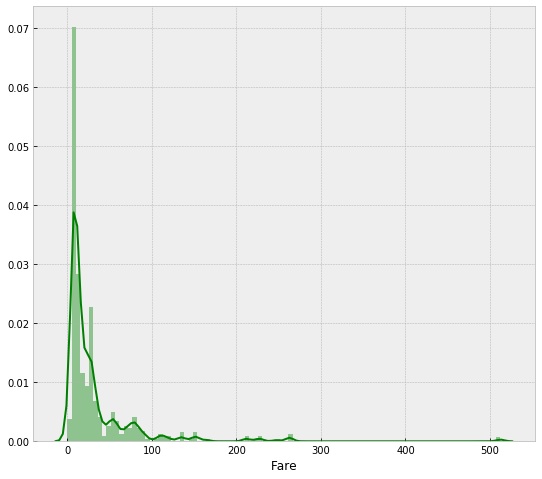

In [27]:
print(df_train['Fare'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_train['Fare'], colorlist(set(df.dtypes.tolist()))='g', bins=100, hist_kws={'alpha': 0.4});

In [28]:
list(set(df_train.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64')]

In [34]:
df_num = df_train.select_dtypes(include = ['float64', 'int64'])
df_num.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


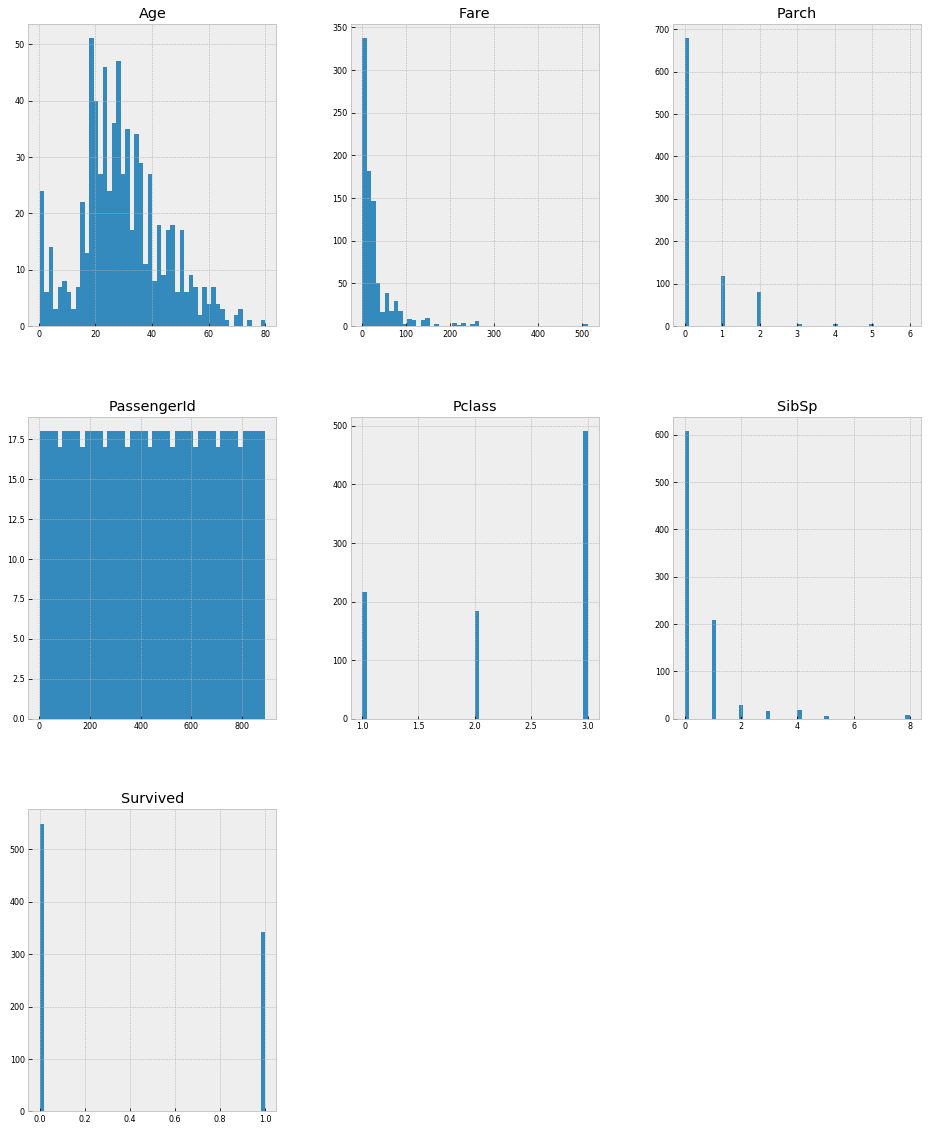

In [35]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [33]:
df_train.Survived.dtype

dtype('int64')

In [37]:
df_num.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [36]:
df_num_corr = df_num.corr()['Survived'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with SalePrice:
Survived    1.0
Name: Survived, dtype: float64


In [ ]:
sns.set_style("darkgrid")

# Checking for missing data

In [ ]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(7)
fig.set_figwidth(10)

sns.heatmap(df.isnull(), ax=ax[0], yticklabels=False, cbar=False)
sns.heatmap(df.isna(), ax=ax[1], yticklabels=False, cbar=False)

# Check Ratio of Survival between Male and Female with Age

In [ ]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df_train, split=True, palette={0: "r", 1: "g"});

# Check Relationship between pair of data

In [ ]:
sns.pairplot(df_train, x_vars=['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked'], y_vars='Survived')

In [ ]:
def process_df(df, y_fld=None, skip_flds=None, ignore_flds=None, do_scale=False, na_dict=None, 
               preproc_fn=None, max_n_cat=None, subset=None, mapper=None):
    if not ignore_flds:
        ignore_flds = []
    if not skip_flds:
        skip_flds = []
    if subset:
        df = get_sample(df, subset)
    else:
        df = df.copy()
    ignore_flds = df.loc[:, ignore_flds]
    df.drop(ignore_flds, axis=1, inplace=True)
    if preproc_fn:
        preproc_fn(df)
    if y_fld is None:
        y = None
    else:
        if not is_numeric_dtype(df[y_fld]):
            df[y_fld] = df[y_fld].cat.codes
        y = df[y_fld].values
        skip_flds += [y_fld]
    df.drop(skip_flds, axis=1, inplace=True)
    
    if na_dict is None:
        na_dict = {}
    else:
        na_dict = na_dict.copy()
    na_dict_initial = na_dict.copy()
    for n, c in df.items():
        na_dict = fix_missing(df, c, n, na_dict)
    if len(na_dict_initial.keys()) > 0:
        df.drop([a + '_na' for a in list(set(na_dict.keys()) - set(na_dict_initial.keys()))], 
               axis = 1, inplace=True)
    if do_scale:
        mapper = scale_vars(df, mapper)
    for n, c in df.items():
        numericalize(df, c, n, max_n_cat)
    df = pd.get_dummies(df, dummy_na=True)
    df = pd.concat([ignore_flds, df], axis=1)
    res = [df, y, na_dict]
    if do_scale:
        res = res + [mapper]
    return res

In [ ]:
def get_sample(df, n):
    idxs = sorted(np.random.permutation(len(df))[:n])
    return df.iloc[idxs].copy()

In [ ]:
def fix_missing(df, col, name, na_dict):
    if is_numeric_dtype(col):
        if pd.isnull(col).sum() or (name in na_dict):
            df[name+'_na'] = pd.isnull(col)
            filler = na_dict[name] if name in na_dict else col.median()
            df[name] = col.fillna(filler)
            na_dict[name] = filler
    return na_dict

In [ ]:
def numericalize(df, col, name, max_n_cat):
    if not is_numeric_dtype(col) and (max_n_cat is None or len(col.cat.categories) > max_n_cat):
        df[name] = col.cat.codes + 1

In [ ]:
def scale_vars(df, mapper):
    warnings.filterwarnings('ignore', category=sklearn.exceptions.DataConversionWarning)
    if mapper is None:
        map_f = [([n], StandardScaler()) for n in df.columns if is_numeric_dtype(df[n])]
        mapper = DataFrameMapper(map_f).fit(df)
    df[mapper.transformed_names_] = mapper.transform(df)
    return mapper

In [ ]:
def train_cats(df):
    for n,c in df.items():
        if is_string_dtype(c): 
            df[n] = c.astype('category').cat.as_ordered()
            

def is_string_dtype(arr_or_dtype):
    if arr_or_dtype is None:
        return False
    try:
        dtype = arr_or_dtype.dtype
        return dtype.kind in ('O', 'S', 'U') and not is_period_dtype(dtype)
    except TypeError:
        return False

In [ ]:
train_cats(df_train)

In [ ]:
df, y, nas = process_df(df_train, 'Survived')

In [ ]:
df.head()

In [ ]:
df_dummy = pd.DataFrame(data = df)

In [ ]:
def scale_data(df, columns):
    left_columns = set(df.columns) - set(columns)
    df_dummy = df.copy()
    df_dummy = df.loc[:, columns].apply(lambda x: np.log(x + 1))
    return pd.concat([df_dummy, df.loc[:, left_columns]], axis=1)

In [ ]:
df_log_transformed = scale_data(df, ['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_log_transformed, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

In [ ]:
from sklearn.metrics import fbeta_score, accuracy_score

In [ ]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = None
    predictions_train = None
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], learner.predict(X_train[:300]))
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, learner.predict(X_test))
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], learner.predict(X_train[:300]), 0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, learner.predict(X_test), 0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
models = [GaussianNB(), LogisticRegression(), DecisionTreeClassifier(),
              RandomForestClassifier(n_estimators=100), GradientBoostingClassifier(n_estimators=100),
             AdaBoostClassifier()]
samples_100 = len(X_train)
samples_10 = int(samples_100 * (0.1))
samples_1 = int(samples_10 * (0.1))
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
results_dict = {}
colors = ['b','g','r', 'y', 'k', 'c', 'm', 'orange']
for model in models:
    print("===========================================")
    for sample in [samples_100]:
        results = train_predict(model, sample, X_train, y_train, X_test, y_test)
        print(results)
        print("---------------------------------------")
    results_dict[model.__class__.__name__] = results
    print("===========================================")
for i, (key ,value) in enumerate(results_dict.items()):
    axes[0, 0].bar(key, value['f_train'], 'o-', color=colors[i],
             label="Training score")
    axes[0, 1].bar(key, value['f_test'], 'o-', color=colors[i],
             label="Training score")
    axes[1, 0].bar(key, value['acc_train'], 'o-', color=colors[i],
             label="Training score")
    axes[1, 1].bar(key, value['acc_test'], 'o-', color=colors[i],
             label="Training score")
fig.tight_layout()

In [ ]:
models = [GradientBoostingClassifier(n_estimators=100),
          GradientBoostingClassifier(n_estimators=500),
          GradientBoostingClassifier(n_estimators=1000),
          GradientBoostingClassifier(n_estimators=1500),
         GradientBoostingClassifier(n_estimators=2000),
         GradientBoostingClassifier(n_estimators=3000)]
samples_100 = len(X_train)
for model in models:
    print("===========================================")
    for sample in [samples_100]:
        results = train_predict(model, sample, X_train, y_train, X_test, y_test)
        print(results)
        print("---------------------------------------")
    results_dict[model.__class__.__name__] = results
    print("===========================================")

In [ ]:
df_test.head()

In [ ]:
train_cats(df_test)

In [ ]:
df_t, y_t, nas = process_df(df_test)

In [ ]:
df_log_transformed_test = scale_data(df_t, ['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'])

In [ ]:
clf = GradientBoostingClassifier(n_estimators=1500)
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = GradientBoostingClassifier(random_state=42)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}

# estimators = [100, 200, 500]
# rate = [0.01, 0.03, 0.1, 0.3, 1.0]

parameters = {
                'learning_rate':[0.1, 0.2, 0.3], 
                'n_estimators':[300, 500, 1000, 1500, 2000, 3000],
                'min_samples_leaf': [1, 2, 3],
                'max_depth': [2, 3, 5]
            }


# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=scorer, n_jobs=-1, cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

In [ ]:
df_log_transformed.head()

In [ ]:
df_log_transformed_test.drop('Fare_na', axis=1, inplace=True)

In [ ]:
df_log_transformed_test.head()

In [ ]:
best_clf.feature_importances_[:]

In [ ]:
y_final = best_clf.predict(df_log_transformed_test)

In [ ]:
result_df = pd.concat([df_test.PassengerId, pd.Series(y_final, name='Survived')], axis=1)

In [ ]:
result_df.to_csv('submission.csv', index=False)

In [ ]:
import sklearn.linear_model as lm